<h1 align='center'>Forest Fires in Brazil Exploratory Data Analysis</h1>

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
df = pd.read_csv('amazon.csv', encoding='ANSI')

In [134]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [175]:
ticks = np.arange(0.5,20.5,1)
labels = np.arange(1998, 2018, 1)

In [176]:
test = pd.pivot_table(df, values='number', index='year', columns='state', aggfunc='sum')

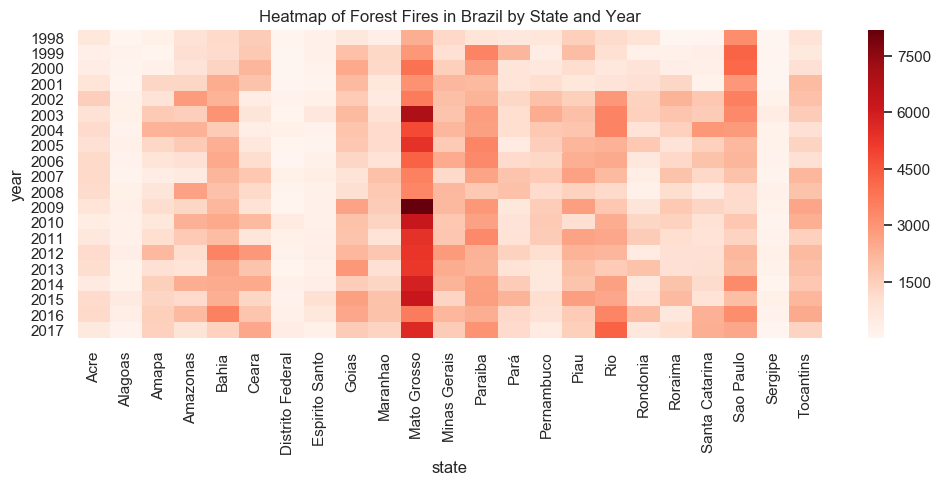

In [177]:
plt.figure(figsize=(12,4))
colormap = plt.cm.get_cmap('Reds')
sns.heatmap(test, cmap=colormap)
plt.yticks(ticks, labels, rotation=0)
plt.ylim((20,0))
plt.title('Heatmap of Forest Fires in Brazil by State and Year')
plt.show()

Appears that Mato Grosso has the biggest problem with forest fires, might need to take it out to get a better look at the other states progressions.

In [188]:
no_mg = df[df.state != 'Mato Grosso']
heatmap2_data = pd.pivot_table(no_mg, values='number', index='year', columns='state', aggfunc='sum')

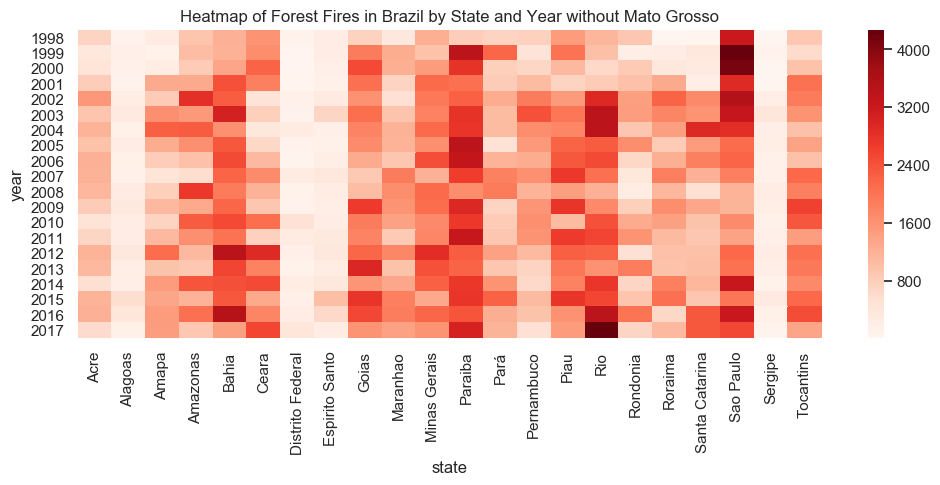

In [189]:
plt.figure(figsize=(12,4))
colormap = plt.cm.get_cmap('Reds')
sns.heatmap(heatmap2_data, cmap=colormap)
plt.yticks(ticks, labels, rotation=0)
plt.ylim((20,0))
plt.title('Heatmap of Forest Fires in Brazil by State and Year without Mato Grosso')
plt.show()

It appears Rio, Ceara, Paraiba, and perhaps Santa Catarina all got worse from 2016-2017.

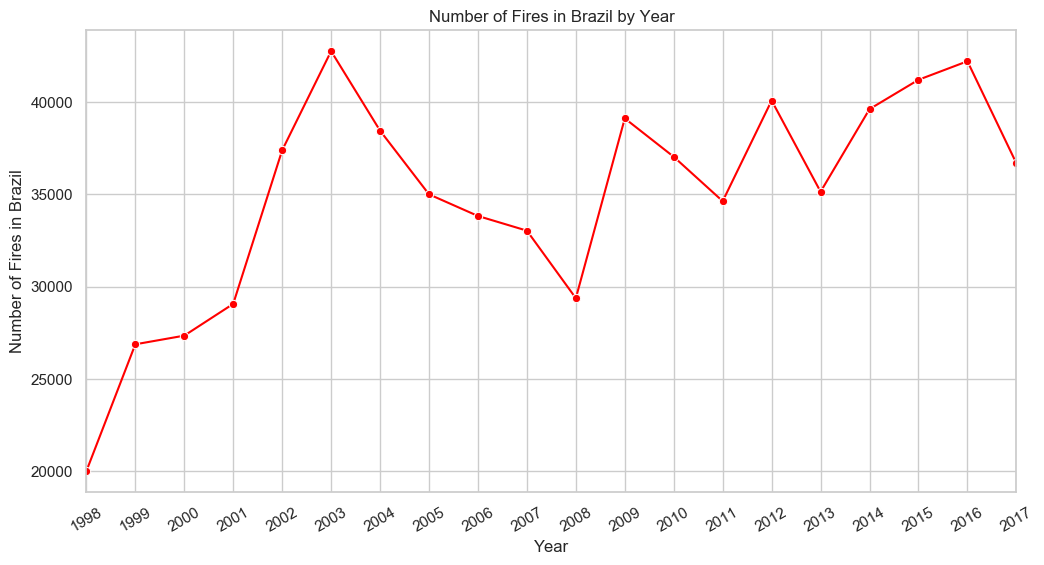

In [185]:
plt.figure(figsize=(12,6))
sns.set(style='whitegrid')
sns.lineplot(x='year', y='number', color='Red', marker='o', ci=None, data=df, estimator='sum')
plt.xlim(1998, 2017)
plt.xticks(ticks=labels, rotation=30)
plt.ylabel('Number of Fires in Brazil')
plt.xlabel('Year')
plt.title('Number of Fires in Brazil by Year')
plt.show()

The overall amount of fires occurring in Brazil seems to be problematic. Since 1998, the amount of fires per year has nearly **doubled**!

Most of this change occurred between 1998 and 2003 and has remained relatively consistent since then.

However, the data doesn't inherently hold any reason for why these fires occur, it may require outside research to find the main reasons fires occur in Brazil.

## Problem

It appears that forest fires in Brazil have been on a steady incline since 1998. What can be done? Is deforestation causing above average amounts of forest fires? Could we test that theory?